In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


## Data Cleaning

In [2]:
dforiginal = pd.read_csv('Mode_Craft_Ecommerce_Data - Online_Retail.csv')
dforiginal.head(10)

/var/folders/8p/zyr5g87n1_5bsq92yv67mmzc0000gn/T/ipykernel_48067/4058506279.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dforiginal = pd.read_csv('Mode_Craft_Ecommerce_Data - Online_Retail.csv')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
1,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
5,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
6,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
7,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom
8,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom


In [3]:
dforiginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
dforiginal['InvoiceDate'] = pd.to_datetime(dforiginal['InvoiceDate'])

/var/folders/8p/zyr5g87n1_5bsq92yv67mmzc0000gn/T/ipykernel_48067/2436009276.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dforiginal['InvoiceDate'] = pd.to_datetime(dforiginal['InvoiceDate'])


In [5]:
dforiginal.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
dforiginal = dforiginal.drop_duplicates()

In [7]:
dforiginal[dforiginal['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2380,536589,21777,NaN,-10,2010-12-01 16:50:00,0.00,NaN,United Kingdom
4310,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.00,NaN,United Kingdom
7105,536996,22712,NaN,-20,2010-12-03 15:30:00,0.00,NaN,United Kingdom
7106,536997,22028,NaN,-20,2010-12-03 15:30:00,0.00,NaN,United Kingdom
7107,536998,85067,NaN,-6,2010-12-03 15:30:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541904,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541905,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541906,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541907,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [8]:
dforiginal[dforiginal['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
613,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1958,536545,21134,NaN,1,2010-12-01 14:32:00,0.00,NaN,United Kingdom
1959,536546,22145,NaN,1,2010-12-01 14:33:00,0.00,NaN,United Kingdom
1960,536547,37509,NaN,1,2010-12-01 14:33:00,0.00,NaN,United Kingdom
1961,536549,85226A,NaN,1,2010-12-01 14:34:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
529253,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.00,NaN,United Kingdom
529302,581408,85175,NaN,20,2011-12-08 14:06:00,0.00,NaN,United Kingdom
529654,581422,23169,smashed,-235,2011-12-08 15:24:00,0.00,NaN,United Kingdom
532619,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom


In [9]:
# Make a copy, ready to clean up dataset
df = dforiginal.copy()

In [51]:
# Drop unreasonable/unrelated data
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df = df[~df['StockCode'].isin(['B', 'm', 'M', 'AMAZONFEE'])]

In [11]:
df = df.reset_index(drop=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
1,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
524555,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
524556,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
524557,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France
524558,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France


In [12]:
df.groupby("StockCode")['Description'].nunique()

StockCode
10002           1
10080           1
10120           1
10123C          1
10124A          1
               ..
gift_0001_10    1
gift_0001_20    1
gift_0001_30    1
gift_0001_40    1
gift_0001_50    1
Name: Description, Length: 3919, dtype: int64

In [ ]:
# Add additional columns for analysis

# Year
df['Year'] = df['InvoiceDate'].dt.year

# Month (1-12)
df['Month'] = df['InvoiceDate'].dt.month

# Date (day of month, 1-31)
df['Day'] = df['InvoiceDate'].dt.day

# Day of Week (Monday=0, Sunday=6)
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Time of day
df['TimeOfDay'] = df['InvoiceDate'].dt.time

# Quarter
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Quarter'] = df['Month'].apply(get_season)

# Revenue (Quantity * UnitPrice)
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [14]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,DayOfWeek,TimeOfDay,Quarter,Revenue
0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,2,08:26:00,Winter,22.00
1,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010,12,1,2,08:26:00,Winter,25.50
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,08:26:00,Winter,20.34
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,08:26:00,Winter,20.34
4,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010,12,1,2,08:26:00,Winter,15.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524555,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,2011,12,9,4,12:50:00,Winter,23.40
524556,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,9,4,12:50:00,Winter,10.20
524557,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,2011,12,9,4,12:50:00,Winter,19.80
524558,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,2011,12,9,4,12:50:00,Winter,19.80


## Exploratory Data Analysis (EDA)

### Seasonality Trends

In [72]:
df.groupby('Year')['Month'].unique()

Year
2010                                       [12]
2011    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Name: Month, dtype: object

In [ ]:
def seasonality_trend(df, product):
    product_df = df[df['Description'] == product]

    trend = product_df.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()
    trend['YearMonth'] = pd.to_datetime(trend[['Year', 'Month']].assign(DAY=1))
    
    # Plotting
    plt.figure(figsize=(12,6))
    plt.plot(trend['YearMonth'], trend['Quantity'], marker='o')
    plt.title(f'Long-term Seasonality of {product} Sales')
    plt.xlabel('Year-Month')
    plt.ylabel('Quantity Sold')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

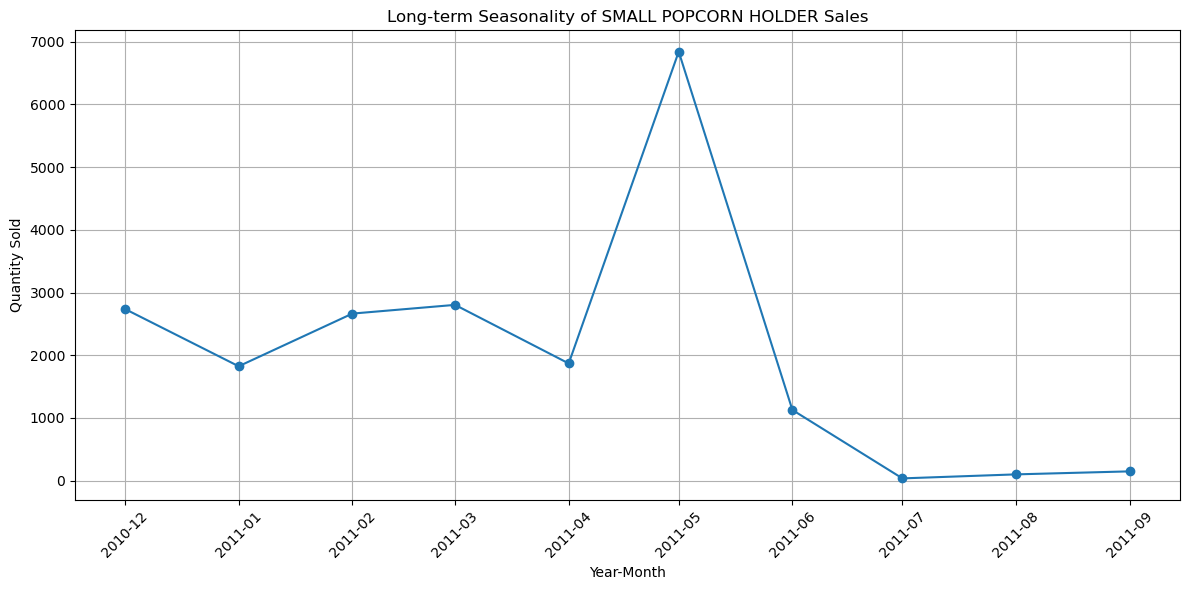

In [69]:
seasonality_trend(df, 'SMALL POPCORN HOLDER')

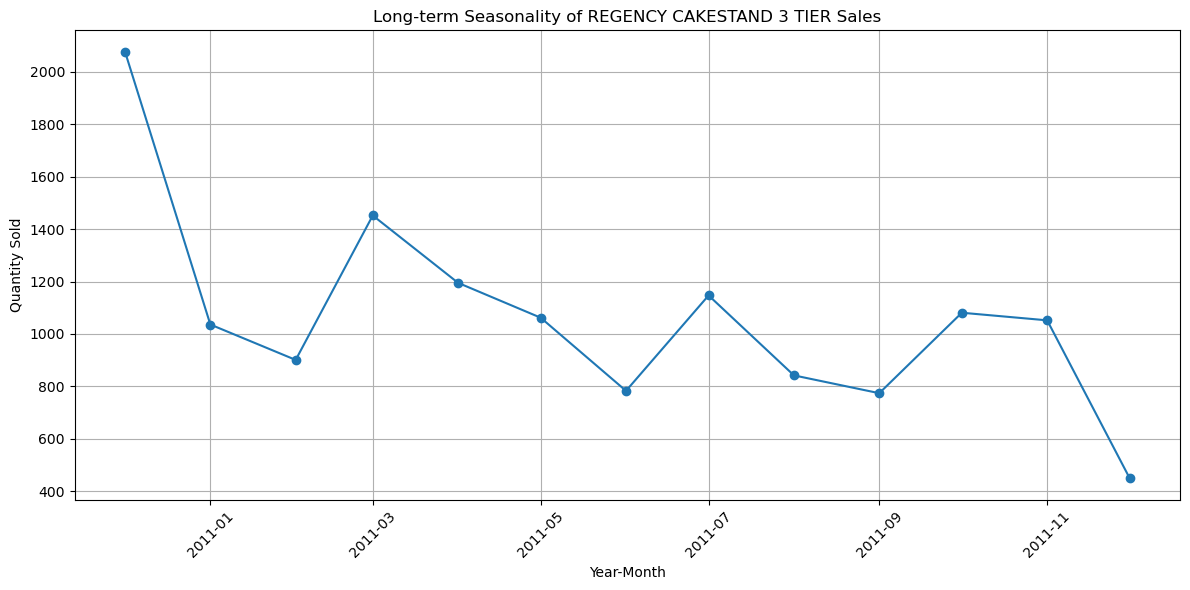

In [70]:
seasonality_trend(df, 'REGENCY CAKESTAND 3 TIER')

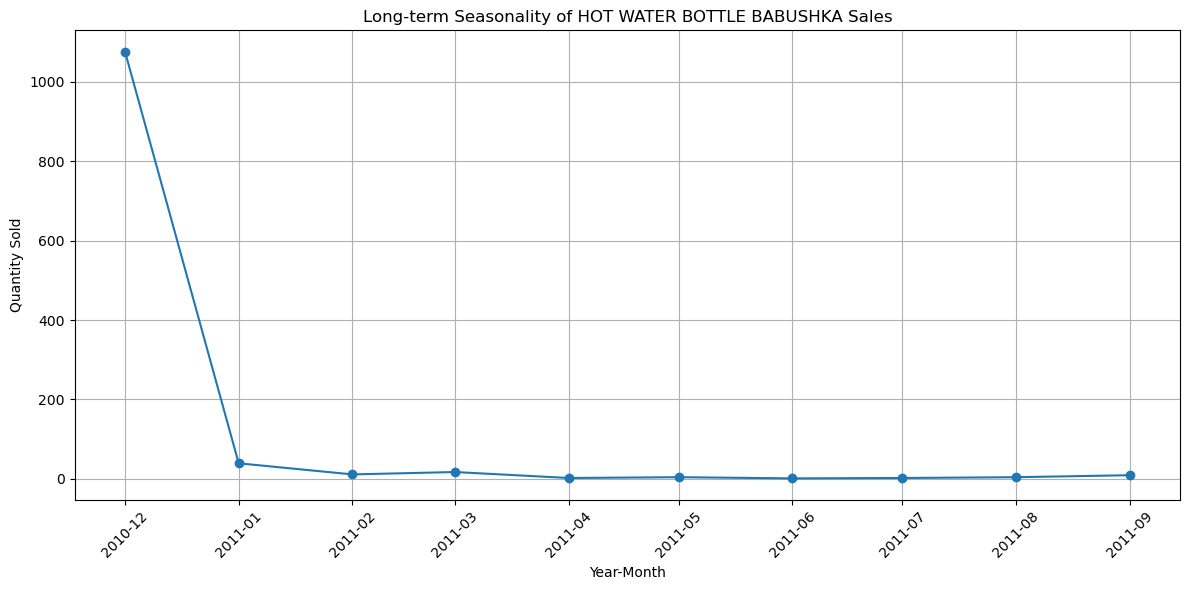

In [71]:
seasonality_trend(df, 'HOT WATER BOTTLE BABUSHKA')

### Monthly Analysis Report (December 2010)

In [52]:
# Filter data for the selected year and month
df_new = df[(df['Year'] == 2010) & (df['Month'] == 12)]

# Products that sold the most
df_new.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False).head(5)

StockCode  Description                       
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     5195
21212      PACK OF 72 RETROSPOT CAKE CASES       4106
85123A     WHITE HANGING HEART T-LIGHT HOLDER    3752
22834      HAND WARMER BABUSHKA DESIGN           3476
22197      SMALL POPCORN HOLDER                  2737
Name: Quantity, dtype: int64

In [53]:
# Products that sold the least
df_new.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values().head(5)

StockCode     Description                       
gift_0001_50  Dotcomgiftshop Gift Voucher �50.00    1
21196         ROUND WHITE CONFETTI IN TUBE          1
90142D        MOP PENDANT SHELL NECKLACE            1
90144         SILVER DROP EARRINGS WITH FLOWER      1
84816         DANISH ROSE BEDSIDE CABINET           1
Name: Quantity, dtype: int64

In [54]:
# Products that generated the most revenue
df_new.groupby(['StockCode', 'Description'])['Revenue'].sum().sort_values(ascending=False).head(5)

StockCode  Description                       
22423      REGENCY CAKESTAND 3 TIER              27694.76
DOT        DOTCOM POSTAGE                        24671.19
85123A     WHITE HANGING HEART T-LIGHT HOLDER    10435.36
84029E     RED WOOLLY HOTTIE WHITE HEART.         9291.73
22086      PAPER CHAIN KIT 50'S CHRISTMAS         9208.10
Name: Revenue, dtype: float64

In [55]:
# Products that generated the least revenue
df_new.groupby(['StockCode', 'Description'])['Revenue'].sum().sort_values().head(5)

StockCode  Description                     
71215      METAL BASE FOR CANDLES              0.42
79151B     SILICON CUBE 25W, BLUE              0.42
79149B     SILICON STAR BULB  BLUE             0.42
47422      ASSORTED MONKEY SUCTION CUP HOOK    0.42
10123C     HEARTS WRAPPING TAPE                0.65
Name: Revenue, dtype: float64

In [56]:
# Customers who bought the most
df_new.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(5)

CustomerID
15061.0    9171
16029.0    7956
14646.0    6714
18102.0    6695
17511.0    6426
Name: Quantity, dtype: int64

In [57]:
# Most popular days of the week
df_new.groupby('DayOfWeek')['Quantity'].count().sort_values(ascending=False)

DayOfWeek
4    7896
0    7686
3    7458
2    7063
1    6377
6    4477
Name: Quantity, dtype: int64

In [58]:
# Most popular times for purchase during the week
df_new.groupby('TimeOfDay')['Quantity'].count().sort_values(ascending=False).head(5)

TimeOfDay
16:57:00    721
14:09:00    701
14:25:00    692
14:41:00    664
14:59:00    646
Name: Quantity, dtype: int64

In [59]:
# Regions that earned the most money
df_new.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(5)

Country
United Kingdom    730060.63
Germany            15205.74
EIRE               10033.26
France              9616.31
Netherlands         8784.48
Name: Revenue, dtype: float64

### Specific Product Analysis

### Customer Insights

### Geographical Analysis

### Products Ranking